In [105]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore
from sklearn import metrics

In [51]:
#Load Parkinson’s Disease data file
silhouette_data = pd.read_csv("vehicle-1.csv")

In [52]:
#Peek into the data
silhouette_data.head(10)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   
5          107          NaN                 106.0         172.0   
6           97         43.0                  73.0         173.0   
7           90         43.0                  66.0         157.0   
8           86         34.0                  62.0         140.0   
9           93         44.0                  98.0           NaN   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   
5                  50.0                        6          255.0   
6                  65.0                        6          153.0   
7                  65.0                        9          137.0   
8                  61.0                        7          122.0   
9                  62.0                       11          183.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   
5           26.0                    28.0                        169   
6           42.0                    19.0                        143   
7           48.0                    18.0                        146   
8           54.0                    17.0                        127   
9           36.0                    22.0                        146   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   
5            280.0              957.0                      264.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   
8            141.0              223.0                      112.0   
9            202.0              505.0                      152.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   
5                         85.0             5.0               9.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   
8                         64.0             2.0              14.0   
9                         64.0             4.0              14.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            1

In [53]:
#Total number of rows and cols
silhouette_data.shape

(846, 19)

In [54]:
#number of points & numer of features
print('No. of features:', silhouette_data.shape[1])
print('No. of Datapoints:', silhouette_data.shape[0])

No. of features: 19
No. of Datapoints: 846


In [55]:
#Display all the features in dataset
silhouette_data.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

In [56]:
#displays the data type
silhouette_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

### Observation: 
class attribute is of object type, it is the target variable and all others are int or float type 

In [57]:
#To check if any missing values are there in any variable
silhouette_data.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

### Observation:
max null values is 6 which are in two columns 'radius_ratio', 'skewness_about'. so we have two options either we will drop those null values or we will impute those null values. Dropping null values is not a good way because we will lose some information.but we will go with both options then we will see what's the effect on model.

In [58]:
#display 5 point summary of dataframe
silhouette_data.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

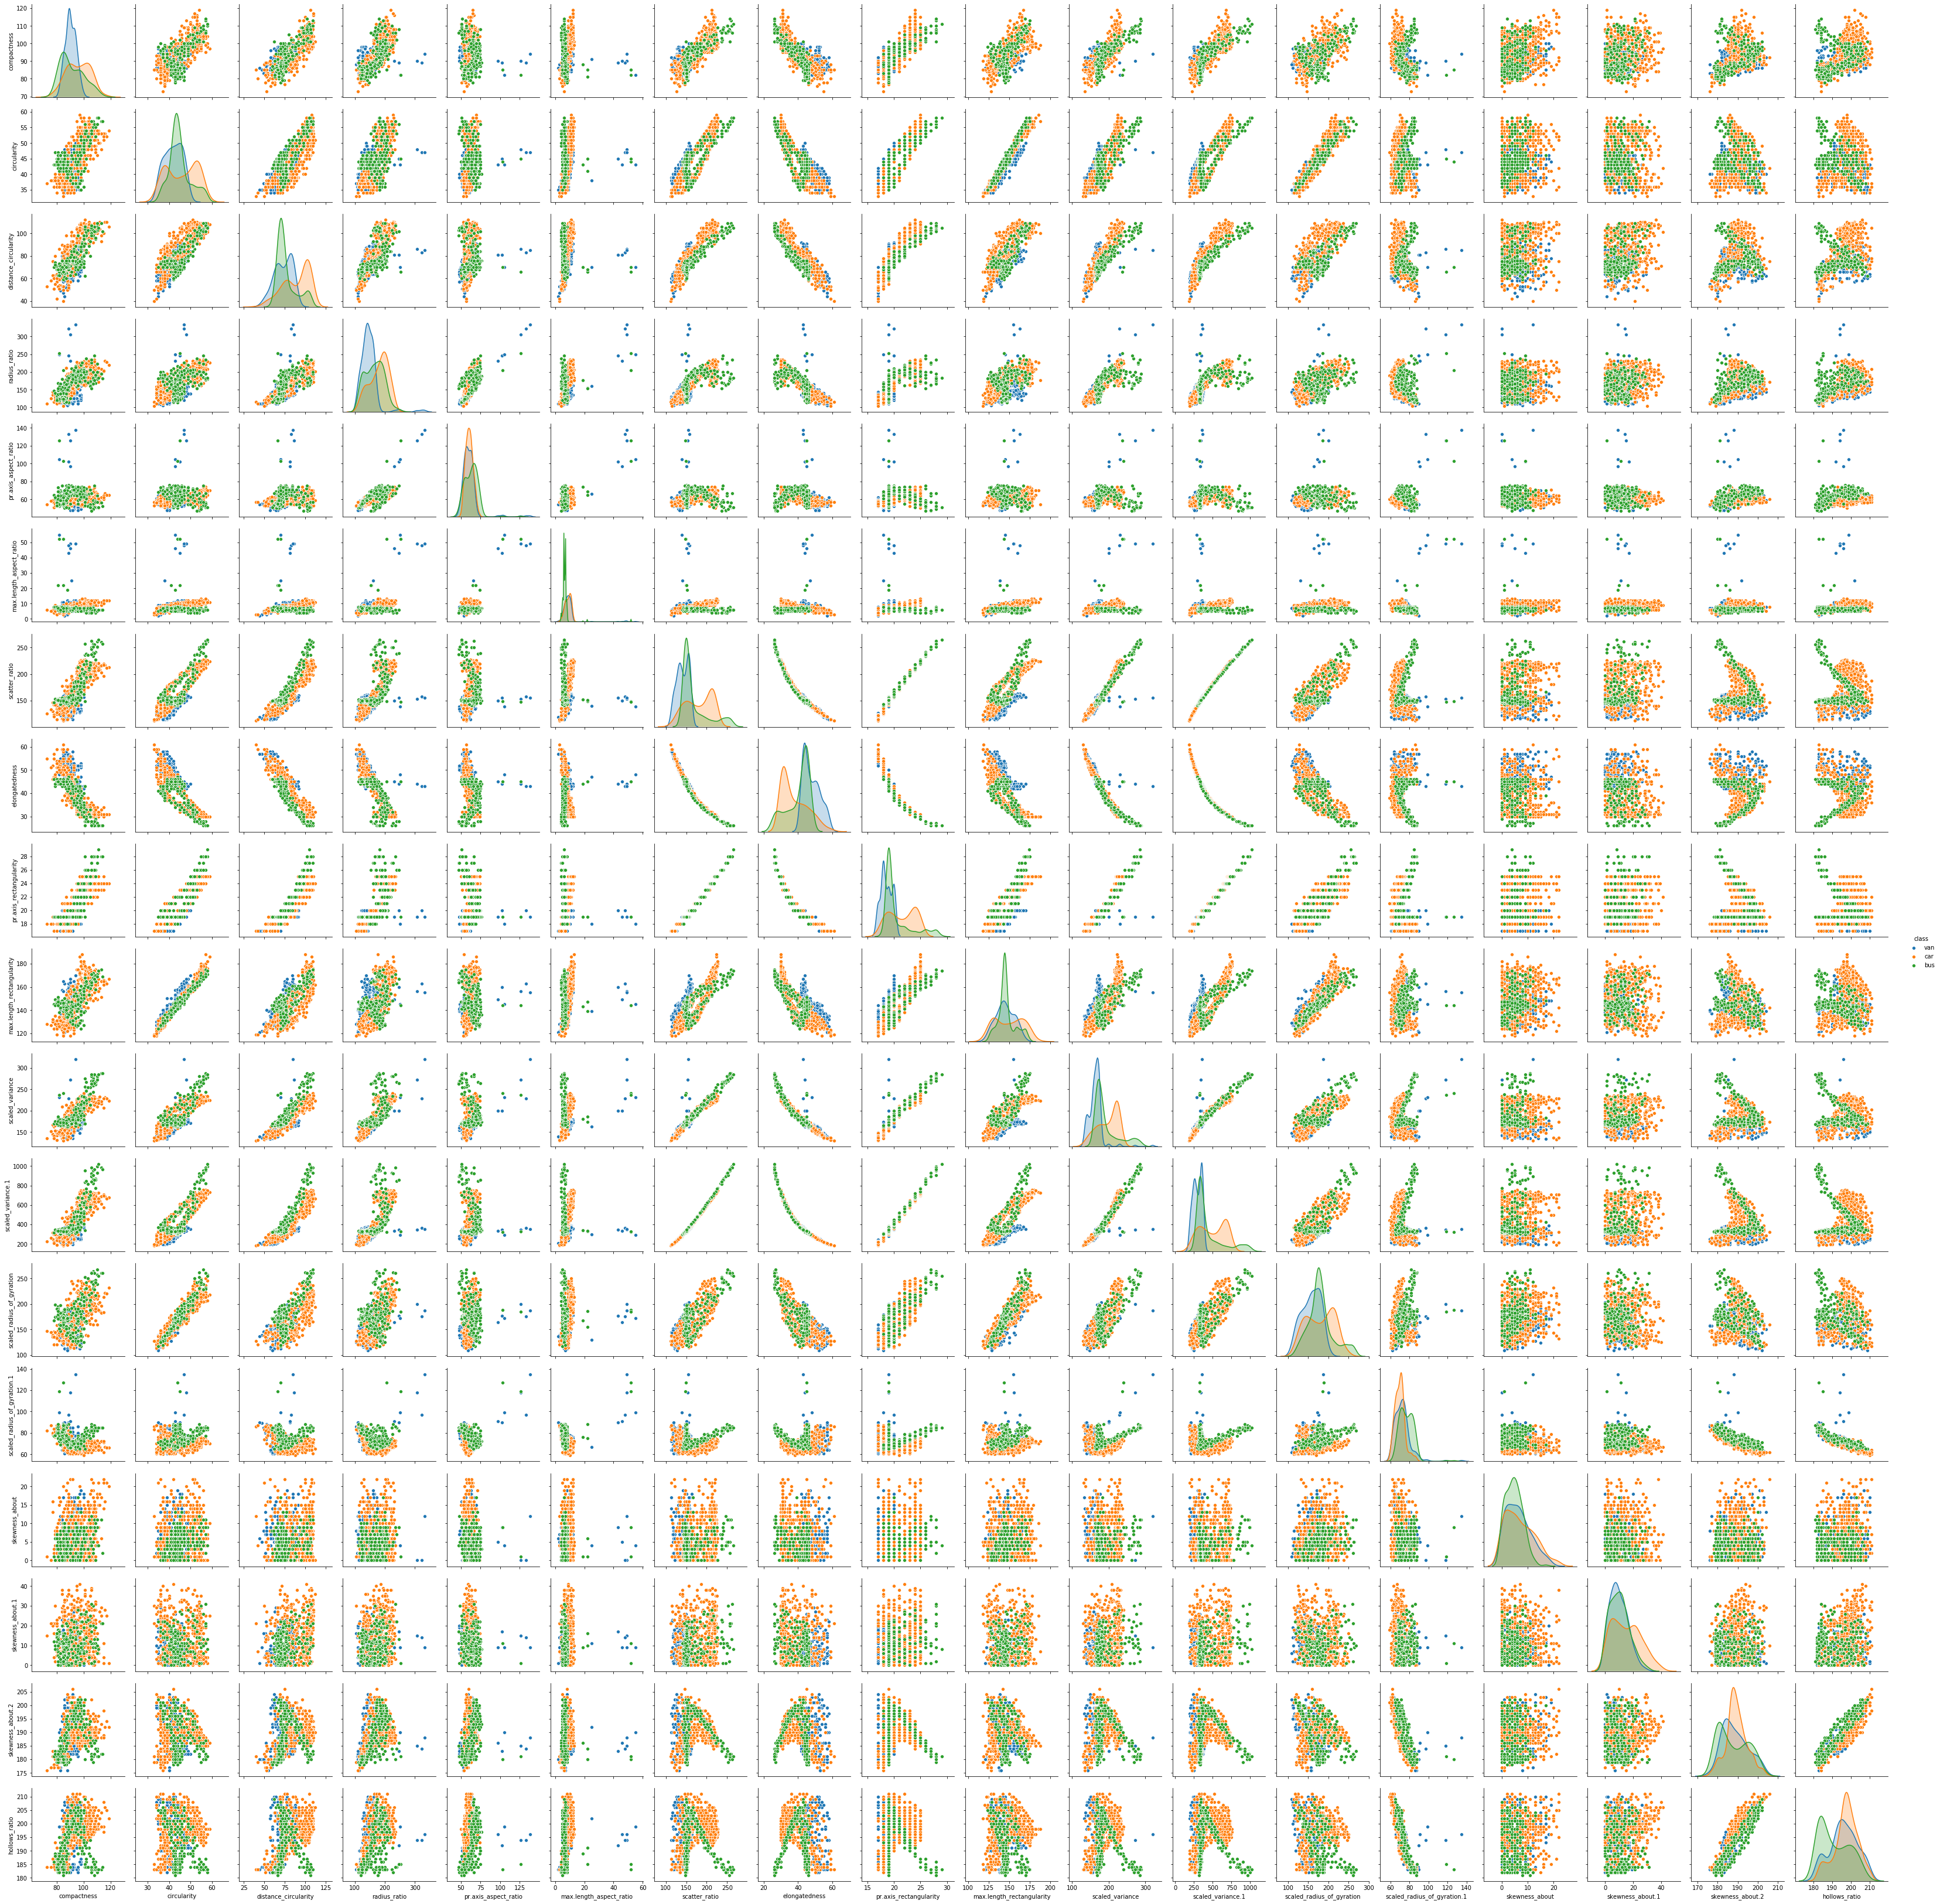

In [46]:
sns.pairplot(silhouette_data,diag_kind='kde', hue='class')
plt.show()

### Observation:
From above pair plots we can see that many columns are correlated and many columns have long tail so that is the indication of outliers.we will see down the line with the help of correlation matrix what's the strength of correlation and outliers are there or not.

In [59]:
#Corelation Matrix of attributes 
silhouette_data.corr()

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.689786              0.791707   
circularity                     0.689786     1.000000              0.797180   
distance_circularity            0.791707     0.797180              1.000000   
radius_ratio                    0.691081     0.625051              0.771748   
pr.axis_aspect_ratio            0.091779     0.154283              0.158684   
max.length_aspect_ratio         0.148249     0.251407              0.264621   
scatter_ratio                   0.812770     0.858265              0.907949   
elongatedness                  -0.788736    -0.827246             -0.913020   
pr.axis_rectangularity          0.814248     0.856603              0.896273   
max.length_rectangularity       0.676143     0.965729              0.775149   
scaled_variance                 0.764361     0.806791              0.865710   
scaled_variance.1               0.818674     0.850863              0.890541   
scaled_radius_of_gyration       0.585845     0.935950              0.706950   
scaled_radius_of_gyration.1    -0.250603     0.053080             -0.227001   
skewness_about                  0.236685     0.144968              0.114665   
skewness_about.1                0.157670    -0.011869              0.266049   
skewness_about.2                0.298528    -0.106339              0.146027   
hollows_ratio                   0.365552     0.045652              0.333648   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.691081              0.091779   
circularity                      0.625051              0.154283   
distance_circularity             0.771748              0.158684   
radius_ratio                     1.000000              0.665363   
pr.axis_aspect_ratio             0.665363              1.000000   
max.length_aspect_ratio          0.450486              0.648861   
scatter_ratio                    0.738480              0.103832   
elongatedness                   -0.792946             -0.183492   
pr.axis_rectangularity           0.712744              0.079566   
max.length_rectangularity        0.571083              0.127322   
scaled_variance                  0.798294              0.273738   
scaled_variance.1                0.725598              0.089750   
scaled_radius_of_gyration        0.541325              0.122454   
scaled_radius_of_gyration.1     -0.181520              0.152860   
skewness_about                   0.049112             -0.058539   
skewness_about.1                 0.174469             -0.032180   
skewness_about.2                 0.382912              0.240201   
hollows_ratio                    0.472339              0.267760   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.148249       0.812770   
circularity                                 0.251407       0.858265   
distance_circularity                        0.264621       0.907949   
radius_ratio                                0.450486       0.738480   
pr.axis_aspect_ratio                        0.648861       0.103832   
max.length_aspect_ratio                     1.000000       0.165998   
scatter_ratio                               0.165998       1.000000   
elongatedness                              -0.180053      -0.973504   
pr.axis_rectangularity                      0.161603       0.992078   
max.length_rectangularity                   0.305943       0.810017   
scaled_variance                             0.319033       0.951672   
scaled_variance.1                           0.143745       0.996328   
scaled_radius_of_gyration                   0.189752       0.800577   
scaled_radius_of_gyration.1                 0.295638      -0.028006   
skewness_about                              0.015446       0.074376   
skewness_about.1                            0.043491       0.213512   
skewness_about.2                           -0.

### Function for Imputing the null or mising values

In [60]:
#Function for Null values treatment

def null_values(base_dataset):
    print("Shape of DataFrame before null treatment",base_dataset.shape)
    print("Null values count before treatment")
    print("***********************************************")
    print(base_dataset.isna().sum(),"\n")
    ## null value percentage     
    null_value_table=(base_dataset.isna().sum()/base_dataset.shape[0])*100
    ## null value percentage beyond threshold drop , else treat the columns    
    retained_columns=null_value_table[null_value_table<30].index
    # if any variable as null value greater than input(like 30% of the data) value than those variable are consider as drop
    drop_columns=null_value_table[null_value_table>30].index
    base_dataset.drop(drop_columns,axis=1,inplace=True)
    len(base_dataset.isna().sum().index)
    #cont=base_dataset.describe().columns
    cont=[col for col in base_dataset.select_dtypes(np.number).columns ]
    cat=[i for i in base_dataset.columns if i not in base_dataset.describe().columns]
    for i in cat:
        base_dataset[i].fillna(base_dataset[i].value_counts().index[0],inplace=True)
    for i in cont:
        base_dataset[i].fillna(base_dataset[i].mean(),inplace=True)
    print("Null values counts after treatment")
    print("***********************************************")
    print(base_dataset.isna().sum())
    print("\nShape of DataFrame after null treatment",base_dataset.shape)

In [61]:
new_silhouette_data = null_values(silhouette_data)

Shape of DataFrame before null treatment (846, 19)
Null values count before treatment
***********************************************
compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64 

Null values counts after treatment
***********************************************
compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_a

In [62]:
#display 5 point summary of new dataframe
silhouette_data.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.828775    6.133943   33.0   40.00   
distance_circularity         846.0   82.110451   15.740902   40.0   70.00   
radius_ratio                 846.0  168.888095   33.400979  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.678910    7.882119   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.901775   33.195188  112.0  147.00   
elongatedness                846.0   40.933728    7.811559   26.0   33.00   
pr.axis_rectangularity       846.0   20.582444    2.588326   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.631079   31.355195  130.0  167.00   
scaled_variance.1            846.0  439.494076  176.457706  184.0  318.25   
scaled_radius_of_gyration    846.0  174.709716   32.546223  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.447743    7.468450   59.0   67.00   
skewness_about               846.0    6.364286    4.903148    0.0    2.00   
skewness_about.1             846.0   12.602367    8.930792    0.0    5.00   
skewness_about.2             846.0  188.919527    6.152166  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%     75%     max  
compactness                   93.0  100.00   119.0  
circularity                   44.0   49.00    59.0  
distance_circularity          80.0   98.00   112.0  
radius_ratio                 168.0  195.00   333.0  
pr.axis_aspect_ratio          61.0   65.00   138.0  
max.length_aspect_ratio        8.0   10.00    55.0  
scatter_ratio                157.0  198.00   265.0  
elongatedness                 43.0   46.00    61.0  
pr.axis_rectangularity        20.0   23.00    29.0  
max.length_rectangularity    146.0  159.00   188.0  
scaled_variance              179.0  217.00   320.0  
scaled_variance.1            364.0  586.75  1018.0  
scaled_radius_of_gyration    174.0  198.00   268.0  
scaled_radius_of_gyration.1   72.0   75.00   135.0  
skewness_about                 6.0    9.00    22.0  
skewness_about.1              11.0   19.00    41.0  
skewness_about.2             188.0  193.00   206.0  
hollows_ratio                197.0  201.00   211.0

### Analysis of each variables

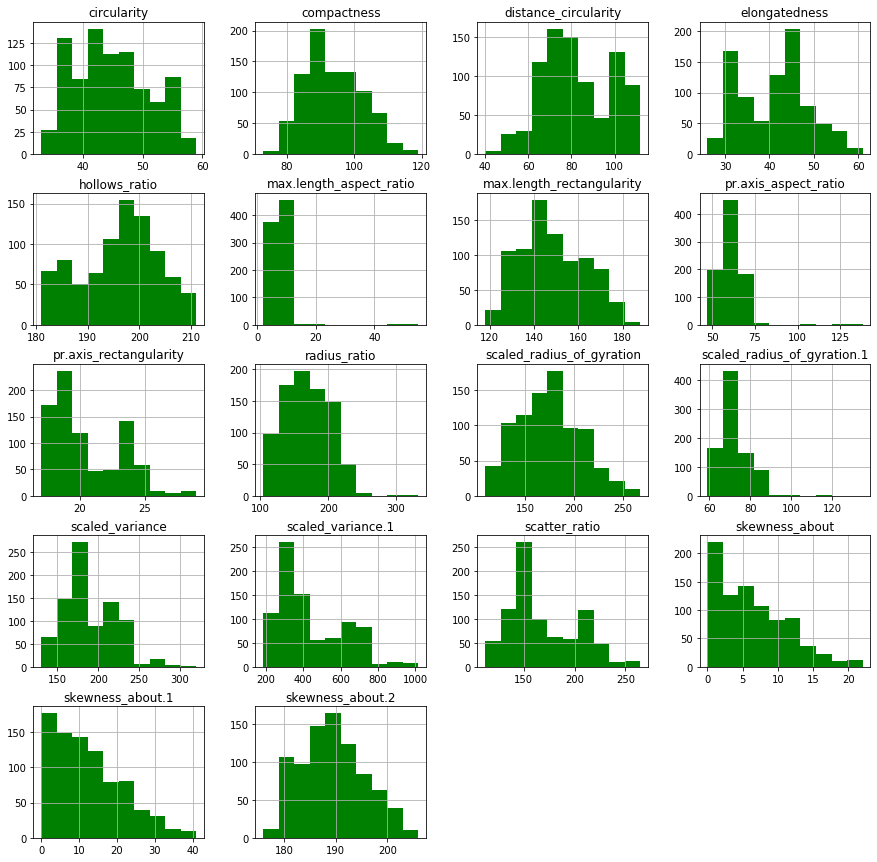

In [65]:
#Distribution of data

silhouette_data.hist( figsize=(15,15), color='green')
plt.show()

### Observation: 
Most of the variables have skewness, some like 'compactness' have normal dist

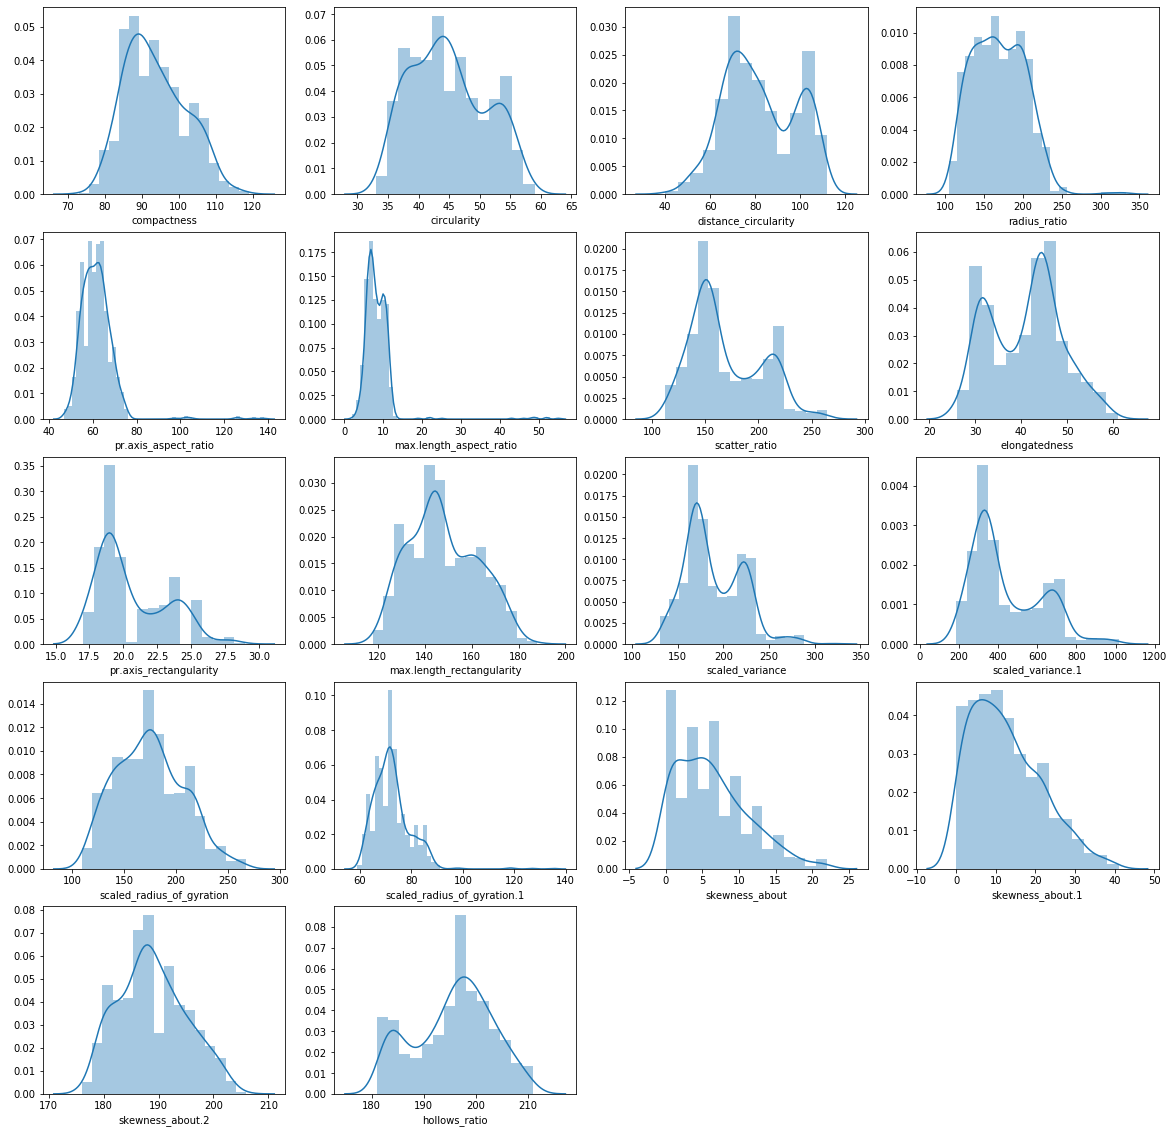

In [66]:
num_features=[col for col in silhouette_data.select_dtypes(np.number).columns ]

plt.figure(figsize=(20,20))
for i,col in enumerate(num_features,start=1):
    plt.subplot(5,4,i);
    sns.distplot(silhouette_data[col])
plt.show()

### Observation:
'compactness','circularity', 'scaled_radius_of_gyration' have normal dist

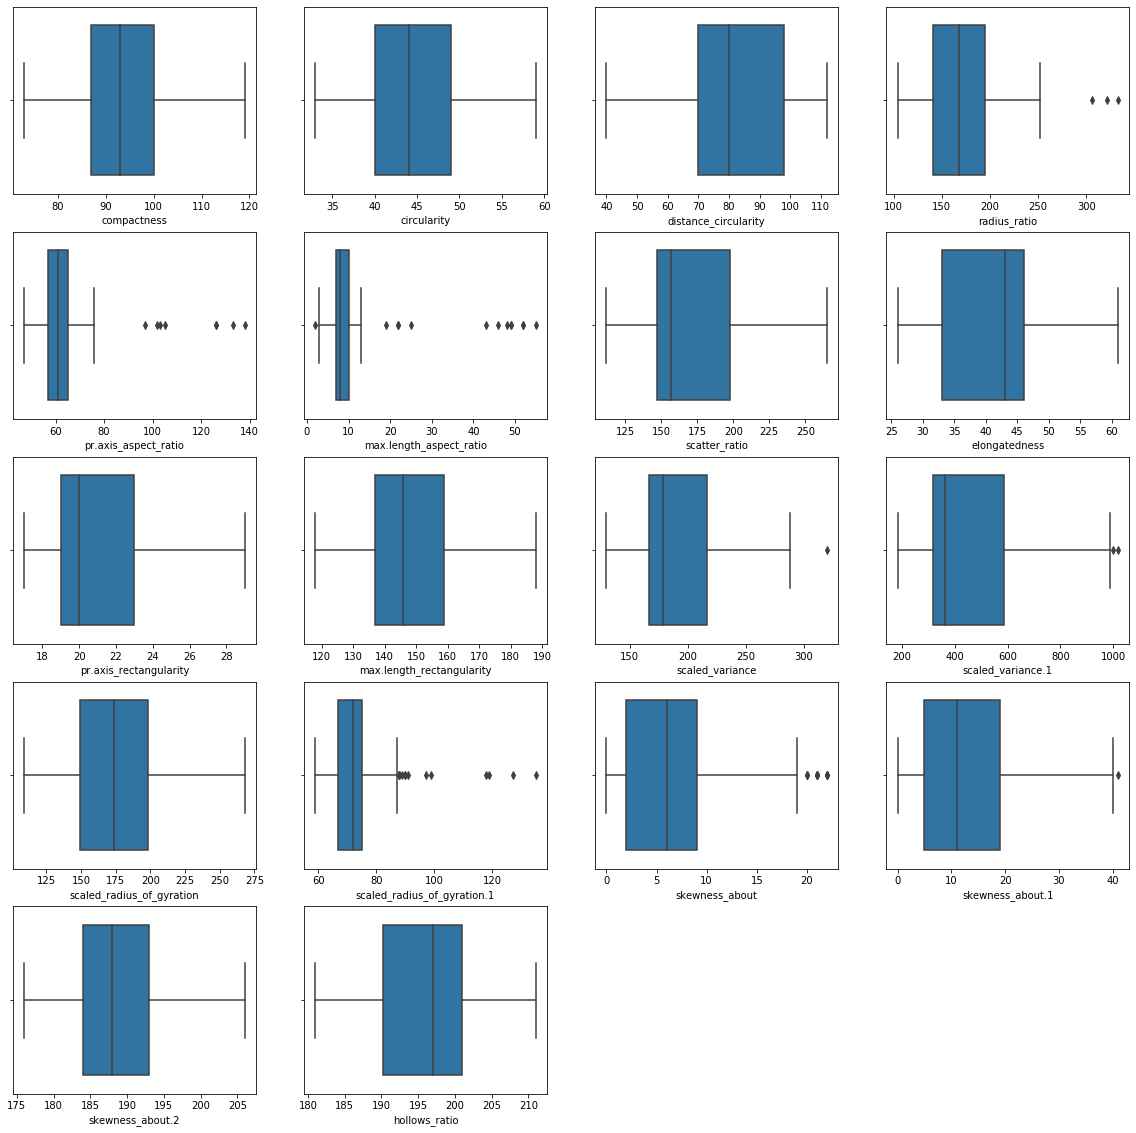

In [67]:
num_features=[col for col in silhouette_data.select_dtypes(np.number).columns ]

plt.figure(figsize=(20,20))
for i,col in enumerate(num_features,start=1):
    plt.subplot(5,4,i);
    sns.boxplot(silhouette_data[col]);
plt.show()

### Observation:
We can notice outliers in few of the variables 

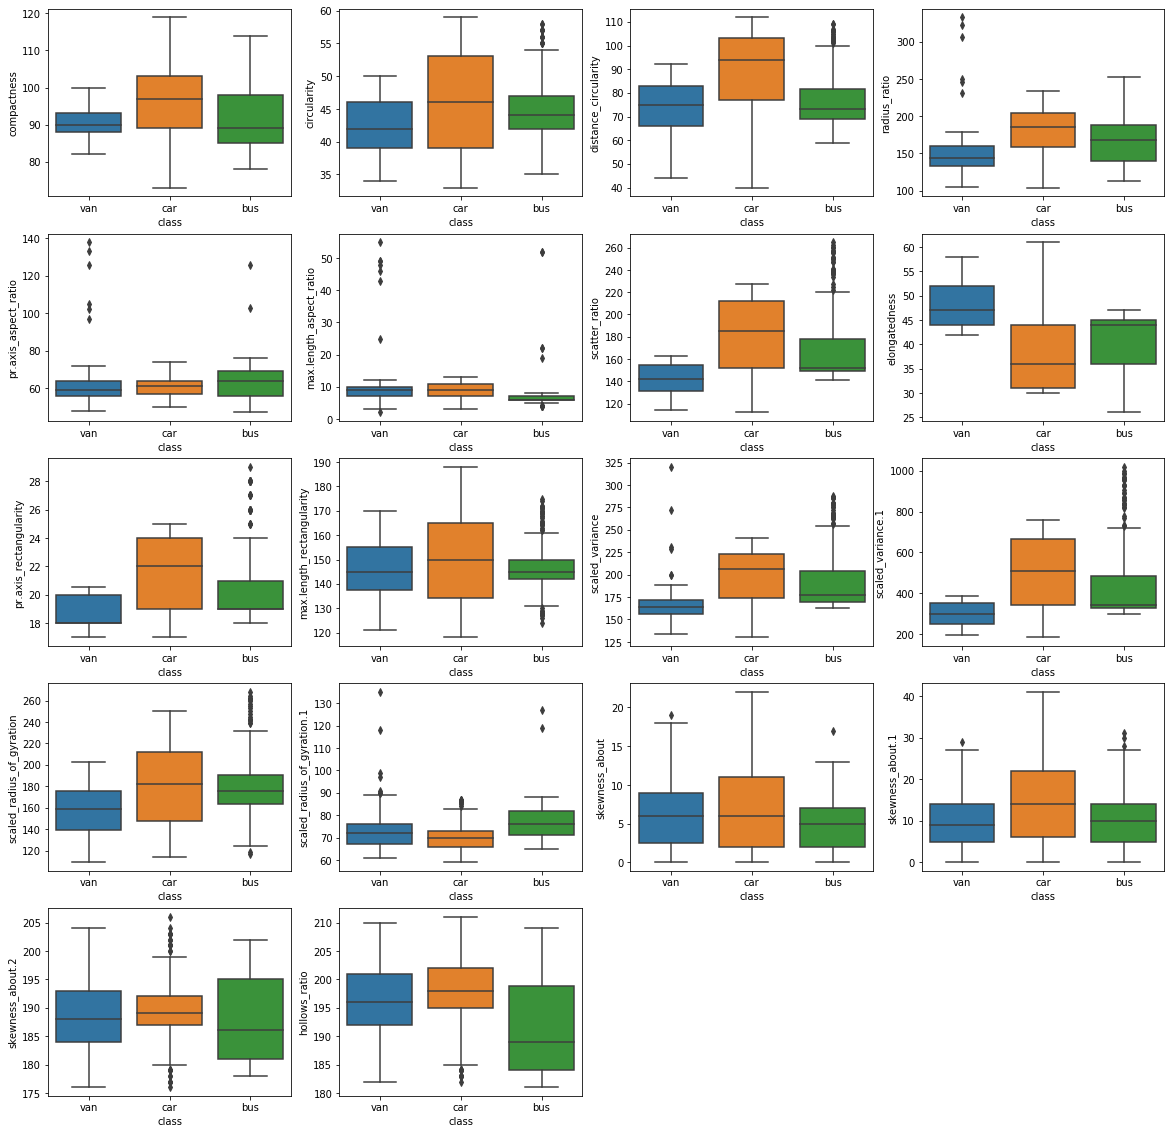

In [70]:
num_features=[col for col in silhouette_data.select_dtypes(np.number).columns ]

plt.figure(figsize=(20,20))
for i,col in enumerate(num_features,start=1):
    plt.subplot(5,4,i);
    sns.boxplot(silhouette_data['class'],silhouette_data[col]);
plt.show()

In [71]:
silhouette_data.skew()

compactness                    0.381271
circularity                    0.262584
distance_circularity           0.106837
radius_ratio                   0.396381
pr.axis_aspect_ratio           3.834882
max.length_aspect_ratio        6.778394
scatter_ratio                  0.607629
elongatedness                  0.047875
pr.axis_rectangularity         0.772254
max.length_rectangularity      0.256359
scaled_variance                0.652753
scaled_variance.1              0.843027
scaled_radius_of_gyration      0.279647
scaled_radius_of_gyration.1    2.088422
skewness_about                 0.779277
skewness_about.1               0.688423
skewness_about.2               0.249468
hollows_ratio                 -0.226341
dtype: float64

### Replace outliers with mean

In [73]:
def outliers_transform(base_dataset):
    num_features=[col for col in base_dataset.select_dtypes(np.number).columns ]
    print("Outliers in Dataset before Treatment")
    print("*********************************************")
    for i,cols in enumerate(num_features,start=1):
        x = base_dataset[cols]
        qr3, qr1=np.percentile(x, [75,25])
        iqr=qr3-qr1
        utv=qr3+(1.5*(iqr))
        ltv=qr1-(1.5*(iqr))
        count=(base_dataset[base_dataset[cols]>utv][cols].count())+(base_dataset[base_dataset[cols]<ltv][cols].count()) 
        print("Column ",cols,"\t has ",count," outliers")
        
    for i,cols in enumerate(num_features,start=1):
        x = base_dataset[cols]
        qr3, qr1=np.percentile(x, [75,25])
        iqr=qr3-qr1
        utv=qr3+(1.5*(iqr))
        ltv=qr1-(1.5*(iqr))
        y=[]
        for p in x:
            if p <ltv or p>utv:
                y.append(np.mean(x))
            else:
                y.append(p)
        base_dataset[cols]=y
                
    print("\nOutliers in Dataset after Treatment")
    print("*********************************************")
    for i,cols in enumerate(num_features,start=1):
        x = base_dataset[cols]
        qr3, qr1=np.percentile(x, [75,25])
        iqr=qr3-qr1
        utv=qr3+(1.5*(iqr))
        ltv=qr1-(1.5*(iqr))
        count=(base_dataset[base_dataset[cols]>utv][cols].count())+(base_dataset[base_dataset[cols]<ltv][cols].count()) 
        print("Column ",cols,"\t has ",count," outliers")

In [74]:
outliers_transform(silhouette_data)

Outliers in Dataset before Treatment
*********************************************
Column  compactness 	 has  0  outliers
Column  circularity 	 has  0  outliers
Column  distance_circularity 	 has  0  outliers
Column  radius_ratio 	 has  3  outliers
Column  pr.axis_aspect_ratio 	 has  8  outliers
Column  max.length_aspect_ratio 	 has  13  outliers
Column  scatter_ratio 	 has  0  outliers
Column  elongatedness 	 has  0  outliers
Column  pr.axis_rectangularity 	 has  0  outliers
Column  max.length_rectangularity 	 has  0  outliers
Column  scaled_variance 	 has  1  outliers
Column  scaled_variance.1 	 has  2  outliers
Column  scaled_radius_of_gyration 	 has  0  outliers
Column  scaled_radius_of_gyration.1 	 has  15  outliers
Column  skewness_about 	 has  12  outliers
Column  skewness_about.1 	 has  1  outliers
Column  skewness_about.2 	 has  0  outliers
Column  hollows_ratio 	 has  0  outliers

Outliers in Dataset after Treatment
*********************************************
Column  compac

In [75]:
#display how many are car,bus,van. 
silhouette_data['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

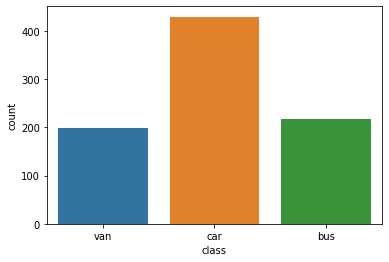

In [76]:
sns.countplot(silhouette_data['class'])
plt.show()

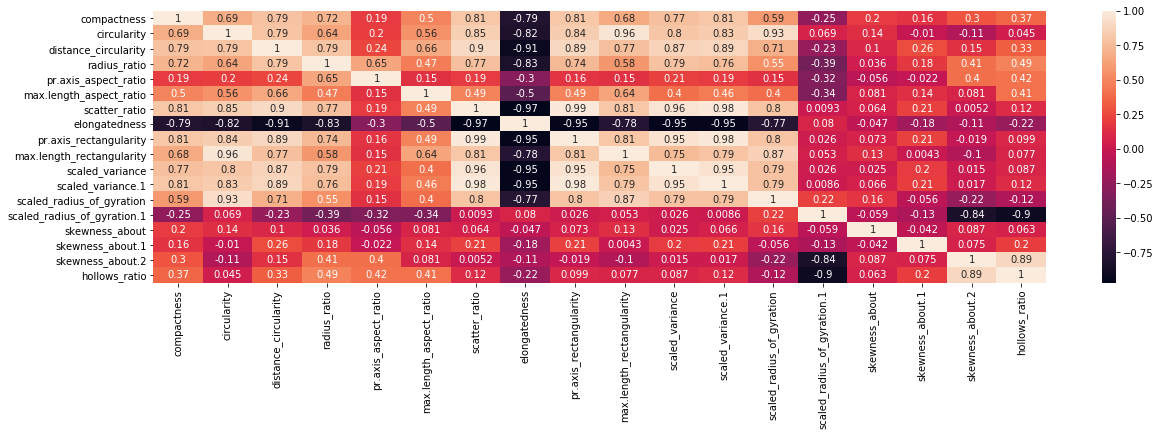

In [77]:
#find the correlation between independent variables
plt.figure(figsize=(20,5))
sns.heatmap(silhouette_data.corr(),annot=True)
plt.show()

### Encode the 'class' variable 

In [78]:
silhouette_data.replace({'car':0,'bus':1,'van':2},inplace=True)

In [79]:
#now separate the dataframe into dependent and independent variables
X = silhouette_data.drop('class',axis=1)
Y = silhouette_data['class']
print("shape of X :", X.shape)
print("shape of Y :", Y.shape)

shape of X : (846, 18)
shape of Y : (846,)


In [81]:
#Scale the data and split into 70% and 30% 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, train_test_split

sc = MinMaxScaler()
X_std = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_std, Y, test_size=0.3, random_state=5)

### Build SVM model

In [134]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        print("Train Result:\n=============")
        print(f"accuracy score: {accuracy_score(y_train, pred):.4f}\n")
        print(f"Confusion Matrix:\n=================\n {confusion_matrix(y_train, clf.predict(X_train))}\n")
        print(metrics.classification_report(y_train, pred))
        
    elif train==False:
        pred = clf.predict(X_test)
        print("Test Result:\n============")        
        print(f"accuracy score: {accuracy_score(y_test, pred)}\n")
        print(f"Confusion Matrix:\n===============\n {confusion_matrix(y_test, pred)}\n")
        print(metrics.classification_report(y_test, pred))

In [135]:
from sklearn.svm import SVC

lsvm = SVC(kernel='linear')
lsvm.fit(X_train, y_train)

print_score(lsvm, X_train, y_train, X_test, y_test, train=True)
print_score(lsvm, X_train, y_train, X_test, y_test, train=False)

lsvm_accuracy=accuracy_score(y_test, lsvm.predict(X_test))

Train Result:
accuracy score: 0.9257

Confusion Matrix:
 [[273  13  10]
 [ 13 138   2]
 [  6   0 137]]

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       296
           1       0.91      0.90      0.91       153
           2       0.92      0.96      0.94       143

    accuracy                           0.93       592
   macro avg       0.92      0.93      0.92       592
weighted avg       0.93      0.93      0.93       592

Test Result:
accuracy score: 0.8818897637795275

Confusion Matrix:
 [[114  10   9]
 [  6  58   1]
 [  2   2  52]]

              precision    recall  f1-score   support

           0       0.93      0.86      0.89       133
           1       0.83      0.89      0.86        65
           2       0.84      0.93      0.88        56

    accuracy                           0.88       254
   macro avg       0.87      0.89      0.88       254
weighted avg       0.89      0.88      0.88       254



Confusion Matrix


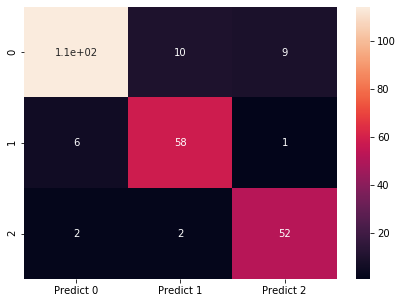

In [107]:
# calculate accuracy measures and confusion matrix

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, pred)

df_cm = pd.DataFrame(cm, index = [i for i in ["0","1","2"]],
                  columns = [i for i in ["Predict 0","Predict 1", "Predict 2"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

### With Principal Component Analysis (PCA)

In [109]:
#now sclaed the features attribute and replace the target attribute values with number
X = silhouette_data.drop('class',axis=1)
y = silhouette_data['class']

X_scaled = X.apply(zscore)

In [110]:
#covariance matrix 
cov_matrix = np.cov(X_scaled,rowvar=False)
print("cov_matrix shape:",cov_matrix.shape)
print("Covariance_matrix",cov_matrix)

cov_matrix shape: (18, 18)
Covariance_matrix [[ 1.00118343  0.68623251  0.79084412  0.72280981  0.19247831  0.49696111
   0.81319623 -0.78957587  0.81459888  0.67694334  0.77154429  0.811318
   0.58584865 -0.24940294  0.19846556  0.1569967   0.2988797   0.36598446]
 [ 0.68623251  1.00118343  0.79395399  0.63918872  0.20304921  0.55954841
   0.84921058 -0.82287347  0.84597164  0.96308094  0.80441647  0.83345344
   0.92798524  0.06915564  0.1372014  -0.01018906 -0.1057698   0.04537164]
 [ 0.79084412  0.79395399  1.00118343  0.79524977  0.24426851  0.66457987
   0.90547061 -0.91251368  0.89418513  0.77558624  0.87119625  0.88804391
   0.70678835 -0.23134244  0.09969208  0.26292611  0.14573497  0.3324884 ]
 [ 0.72280981  0.63918872  0.79524977  1.00118343  0.65301362  0.46700327
   0.77056309 -0.82663319  0.74482646  0.58056101  0.78808655  0.76346677
   0.55167826 -0.39076107  0.03636776  0.18003636  0.40613306  0.49226262]
 [ 0.19247831  0.20304921  0.24426851  0.65301362  1.00118343  0.

In [112]:
#now with the help of above covariance matrix we will find eigen value and eigen vectors
from sklearn.decomposition import PCA
pca = PCA(n_components=18)
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=18, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [114]:
#display explained variance ratio
print(pca.explained_variance_)

[9.75551697e+00 3.35507453e+00 1.19310773e+00 1.13391164e+00
 8.85340870e-01 6.68186762e-01 3.18009887e-01 2.26371692e-01
 1.26452490e-01 7.91816569e-02 7.39366203e-02 6.36395582e-02
 3.91551857e-02 3.10492168e-02 2.78373819e-02 1.99430383e-02
 1.87701520e-02 5.81640509e-03]


In [115]:
print(pca.components_)

[[ 2.72419690e-01  2.87361811e-01  3.02294487e-01  2.69729207e-01
   9.77923893e-02  1.94496082e-01  3.10279044e-01 -3.08862952e-01
   3.07260318e-01  2.78104234e-01  2.99918806e-01  3.06427053e-01
   2.63226076e-01 -4.22914409e-02  3.61461444e-02  5.88057705e-02
   3.77737374e-02  8.45320455e-02]
 [-8.72404150e-02  1.32011548e-01 -4.61279713e-02 -1.97855810e-01
  -2.57465319e-01 -1.07717657e-01  7.49939645e-02 -1.29509622e-02
   8.74393517e-02  1.21794527e-01  7.66546849e-02  7.21857931e-02
   2.10366262e-01  5.04182948e-01 -1.63273149e-02 -9.28941160e-02
  -5.01539937e-01 -5.07489065e-01]
 [-3.67147841e-02 -2.01757077e-01  6.41009526e-02  5.36110291e-02
  -6.73210975e-02 -1.48021404e-01  1.09718662e-01 -9.12276965e-02
   1.06445390e-01 -2.13772682e-01  1.44195011e-01  1.10087363e-01
  -2.03683802e-01  7.29028715e-02 -5.55309485e-01  6.73484971e-01
  -6.16791010e-02 -4.07703018e-02]
 [ 1.40534235e-01 -3.68680219e-02  1.07830429e-01 -2.54482192e-01
  -6.13571672e-01  2.72381835e-01  5.

In [116]:
print(pca.explained_variance_ratio_)

[5.41332535e-01 1.86172706e-01 6.62054129e-02 6.29206288e-02
 4.91274649e-02 3.70776079e-02 1.76463327e-02 1.25613396e-02
 7.01683438e-03 4.39378120e-03 4.10273471e-03 3.53135190e-03
 2.17271683e-03 1.72291754e-03 1.54469318e-03 1.10663694e-03
 1.04155361e-03 3.22751662e-04]


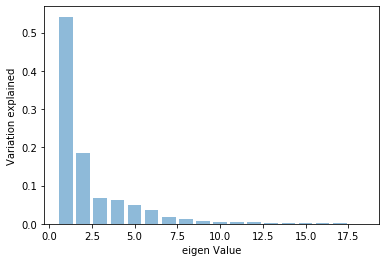

In [118]:
plt.bar(list(range(1,19)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

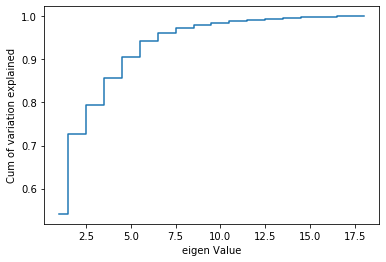

In [119]:
plt.step(list(range(1,19)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

### Observation: 
From above we can see that 8 dimension are able to explain 95%variance of data. so we will use first 8 principal components

In [120]:
#use first 8 principal components
pca_8c = PCA(n_components=8)
pca_8c.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [121]:
#transform the raw data which is in 18 dimension into 8 new dimension with pca
X_scaled_pca_8c = pca_8c.transform(X_scaled)

In [122]:
#display the shape of new_vehicle_df_pca_independent_attr
X_scaled_pca_8c.shape

(846, 8)

In [123]:
#now split the data into 80:20 ratio
rawdata_X_train,rawdata_X_test,rawdata_y_train,rawdata_y_test = train_test_split(X_scaled,Y,test_size=0.20,random_state=1)
pca_X_train,pca_X_test,pca_y_train,pca_y_test = train_test_split(X_scaled_pca_8c,Y,test_size=0.20,random_state=1)

In [124]:
print("shape of rawdata_X_train",rawdata_X_train.shape)
print("shape of rawdata_y_train",rawdata_y_train.shape)
print("shape of rawdata_X_test",rawdata_X_test.shape)
print("shape of rawdata_y_test",rawdata_y_test.shape)
print("--------------------------------------------")
print("shape of pca_X_train",pca_X_train.shape)
print("shape of pca_y_train",pca_y_train.shape)
print("shape of pca_X_test",pca_X_test.shape)
print("shape of pca_y_test",pca_y_test.shape)

shape of rawdata_X_train (676, 18)
shape of rawdata_y_train (676,)
shape of rawdata_X_test (170, 18)
shape of rawdata_y_test (170,)
--------------------------------------------
shape of pca_X_train (676, 8)
shape of pca_y_train (676,)
shape of pca_X_test (170, 8)
shape of pca_y_test (170,)


### Without PCA

[0.97058824 0.94117647 0.97058824 0.94117647 0.92647059 0.92647059
 0.95522388 0.98507463 0.97014925 0.94029851] 

Accuracy: 95.27 (+/- 3.90)


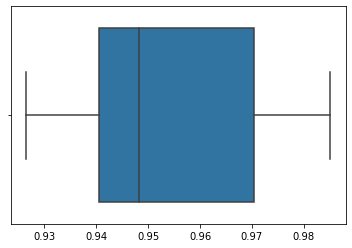

In [126]:
from sklearn.model_selection import KFold, cross_val_score


kfold = KFold(n_splits= 10, shuffle=True, random_state = 1)

svc = SVC() #instantiate the object

#now we will train the model with raw data

results = cross_val_score(estimator = svc, X = rawdata_X_train, y = rawdata_y_train, cv = kfold)

print(results,"\n")

print("Accuracy: %0.2f (+/- %0.2f)" % (results.mean()*100, results.std()*100 * 2))

sns.boxplot(results)
plt.show()

In [144]:
svc.fit(rawdata_X_train,rawdata_y_train)

print("Raw Data Training Accuracy :\t ", svc.score(rawdata_X_train, rawdata_y_train))

raw_train_accuracy=svc.score(rawdata_X_train, rawdata_y_train)

#Scoring the model on test_data
print("Raw Data Testing Accuracy :\t  ",  svc.score(rawdata_X_test, rawdata_y_test))

raw_test_accuracy=svc.score(rawdata_X_test, rawdata_y_test)

rawdata_y_pred = svc.predict(rawdata_X_test)

Raw Data Training Accuracy :	  0.9718934911242604
Raw Data Testing Accuracy :	   0.9647058823529412


In [130]:
print(metrics.classification_report(rawdata_y_test, svc.predict(rawdata_X_test)))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        90
           1       0.97      0.97      0.97        37
           2       0.95      0.95      0.95        43

    accuracy                           0.96       170
   macro avg       0.96      0.96      0.96       170
weighted avg       0.96      0.96      0.96       170



### With PCA

[0.92647059 0.92647059 0.94117647 0.92647059 0.92647059 0.86764706
 0.94029851 0.98507463 0.97014925 0.94029851] 

Accuracy: 93.51 (+/- 5.89)


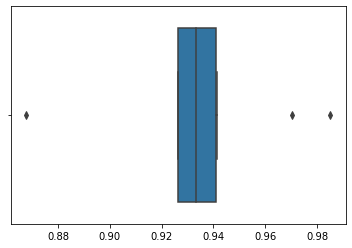

In [137]:
#now fit the model on pca data with new dimension

from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits= 10, random_state = 1, shuffle=True)

svc = SVC() #instantiate the object

#now train the model with pca data with new dimension

pca_results = cross_val_score(estimator = svc, X = pca_X_train, y = pca_y_train, cv = kfold)

print(pca_results,"\n")

print("Accuracy: %0.2f (+/- %0.2f)" % (pca_results.mean()*100, pca_results.std()*100 * 2))

sns.boxplot(pca_results)
plt.show()

### Observation:
By reducing 10 dimention we are getting a accuracy of 93.51

In [147]:
svc.fit(pca_X_train,pca_y_train)

print("PCA data Training Accuracy :\t ", svc.score(pca_X_train, pca_y_train))

pca_train_accuracy=svc.score(pca_X_train, pca_y_train)

#Scoring the model on test_data
print("PCA data Testing Accuracy :\t  ",  svc.score(pca_X_test, pca_y_test))

pca_test_accuracy=svc.score(pca_X_test, pca_y_test)
pca_y_pred = svc.predict(pca_X_test)

PCA data Training Accuracy :	  0.9571005917159763
PCA data Testing Accuracy :	   0.9294117647058824


In [140]:
print(metrics.classification_report(pca_y_test, svc.predict(pca_X_test)))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93        90
           1       0.95      0.95      0.95        37
           2       0.93      0.88      0.90        43

    accuracy                           0.93       170
   macro avg       0.93      0.92      0.93       170
weighted avg       0.93      0.93      0.93       170



In [148]:
#display confusion matrix of both models
print("Confusion matrix with raw data(18 dimension)\n",metrics.confusion_matrix(rawdata_y_test,rawdata_y_pred))
print("Confusion matrix with pca data(8 dimension)\n",metrics.confusion_matrix(pca_y_test,pca_y_pred))

Confusion matrix with raw data(18 dimension)
 [[87  1  2]
 [ 1 36  0]
 [ 2  0 41]]
Confusion matrix with pca data(8 dimension)
 [[85  2  3]
 [ 2 35  0]
 [ 5  0 38]]


In [149]:
result = pd.DataFrame({'TrainTest' : ['raw_train_accuracy', 'raw_test_accuracy', 'pca_train_accuracy','pca_test_accuracy'], 
                       'Accuracy' : [raw_train_accuracy,raw_test_accuracy, pca_train_accuracy, pca_test_accuracy],
                      })
result

TrainTest  Accuracy
0  raw_train_accuracy  0.971893
1   raw_test_accuracy  0.964706
2  pca_train_accuracy  0.957101
3   pca_test_accuracy  0.929412

### Conclusion:
From above we can see that pca is doing a very good job.Accuracy with pca is approx 94% and with raw data approx 96% but note that pca 94% accuracy is with only 8 dimension where as rawdata has 18 dimension.But every thing has two sides, disadvantage of pca is we cannot do interpretation with the model.it's blackbox.